# seaborn练习（与matplotlib B练习相同，使用MAG中和“数据可视化”相关的科学文献数据集）

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

### 0. 请先阅读数据说明。注意：在以下分析中，如果发现数据异常，可以直接进行数据规整和处理。由于你已经完成了matplotlib B的练习，所以这部分可以使用之前处理过的数据。

### 1. 请针对数据集中各文献类型（在doc_type字段）的作者人数（即一篇论文有多少个作者）做可视化，并对结果进行简要解读。（提示：可以使用箱线图）

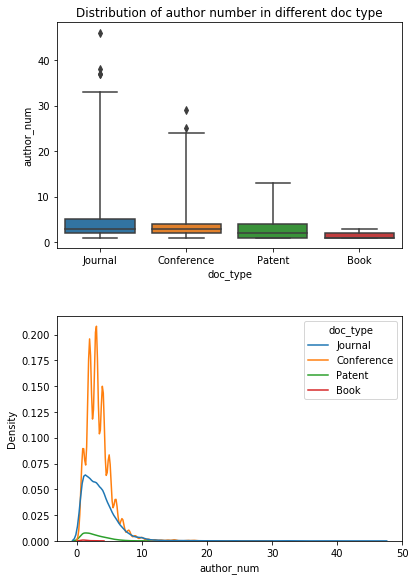

In [19]:
paper_info = pd.read_csv("./dataset/paper_table.txt",sep=";")
author_info = pd.read_csv("./dataset/author2paper_table.txt",sep=";")
author_count = author_info["paper_id"].value_counts()
paperid_authornum = pd.DataFrame({"paper_id":author_count.index, "author_num":author_count.values})
paper_author_info = pd.merge(paper_info,paperid_authornum,on="paper_id")
f=plt.figure()
f.add_subplot(2,1,1)
ax1 = sns.boxplot(data=paper_author_info,x="doc_type",y="author_num",whis=10)
ax1.set_title("Distribution of author number in different doc type")
f.add_subplot(2,1,2)
ax2 = sns.kdeplot(data=paper_author_info, x="author_num",hue="doc_type")
plt.subplots_adjust(left=0,right = 0.8,bottom = 0,top = 1.8,wspace = 0.2,hspace = 0.3)
plt.show()

### 2. 请对各篇文献被引次数的分布进行可视化，并对结果进行简要解读。（提示：尝试ppt中各种不同的单变量直方图、密度分布、累积分布等）

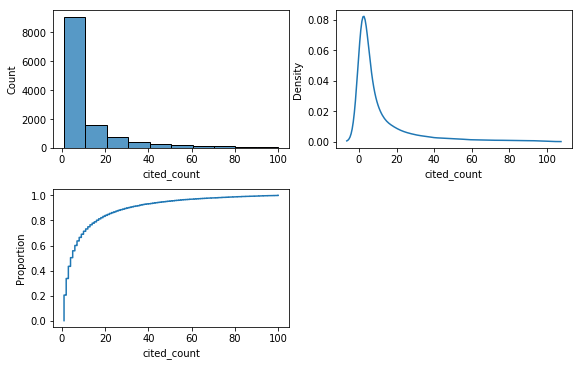

In [3]:
citation_info = pd.read_csv("./dataset/citation_table.txt",sep=";")
cited_count = citation_info["cited_id"].value_counts()
paperid_citedcount = pd.DataFrame({"paper_id":cited_count.index,"cited_count":cited_count.values})
data = paperid_citedcount[paperid_citedcount.cited_count<=100]
f=plt.figure()
f.add_subplot(2,2,1)
sns.histplot(data,x="cited_count",bins=10)
f.add_subplot(2,2,2)
sns.kdeplot(data=data,x="cited_count")
f.add_subplot(2,2,3)
sns.ecdfplot(data=data,x="cited_count")
plt.subplots_adjust(left=0,right = 1.2,bottom = 0.1,top = 1.2,wspace = 0.2,hspace = 0.3)

### 3. 一篇论文中的作者人数和该论文的被引次数有何关系？请针对此做可视化，并对结果进行简要解读。（提示：可以用sns.relplot散点图或其他你认为合适的方式）

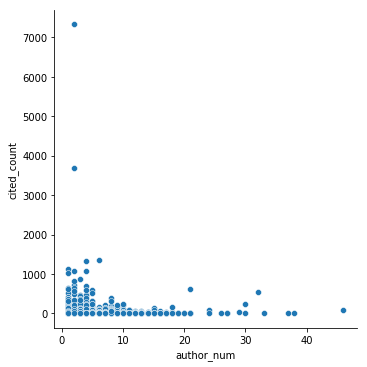

In [4]:
authornum_citedcount = pd.merge(paperid_authornum,paperid_citedcount,on="paper_id")
sns.relplot(data=authornum_citedcount,x="author_num",y="cited_count")

由于这个图实在没法看，所以算一下相关系数

In [5]:
print("pearson相关系数: ",authornum_citedcount["cited_count"].corr(authornum_citedcount["author_num"],method="pearson"))
print("spearman相关系数: ",authornum_citedcount["cited_count"].corr(authornum_citedcount["author_num"],method="spearman"))

pearson相关系数:  0.006506963656183653
spearman相关系数:  0.06355115934508253


从相关系数来看，被引次数和作者人数之间几乎不存在什么关系，下面对相同作者数量的论文进行聚合

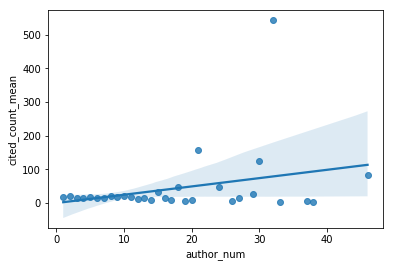

In [16]:
mean_data = authornum_citedcount.groupby("author_num")["cited_count"].mean()
mean_data = pd.DataFrame({"author_num":mean_data.index, "cited_count_mean":mean_data.values})
#median_data = authornum_citedcount.groupby("author_num")["cited_count"].median()
#median_data = pd.DataFrame({"author_num":median_data.index, "cited_count_median":median_data.values})
sns.regplot(data=mean_data,x="author_num",y="cited_count_mean",ci=95)
#sns.relplot(data=median_data,x="author_num",y="cited_count_median")

从回归图可以看出，对author_num进行聚合，得到的被引次数均值与作者数量之间呈现出了一定的正相关关系

### 4. 在这里，我们简单地认为被引量在10次及以上的为高被引论文，少于10次的为低被引论文。请考察这两类论文中，作者数量的分布差异，并对结果进行简要解读。（提示：可以画定类箱线图、定类小提琴图等或使用其他你认为合适的方式）

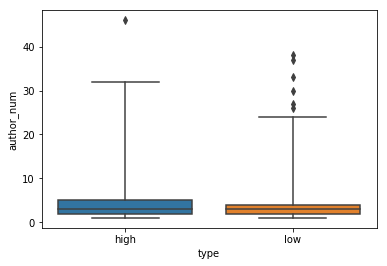

In [11]:
authornum_citedcount["type"] = authornum_citedcount.cited_count>=10
authornum_citedcount["type"].replace(True,"high",inplace=True)
authornum_citedcount["type"].replace(False,"low",inplace=True)
sns.boxplot(data=authornum_citedcount,x="type",y="author_num",whis=10)


In [8]:
high = authornum_citedcount[authornum_citedcount.type=="high"]
low = authornum_citedcount[authornum_citedcount.type=="low"]
print("高被引论文作者数分布：")
print('平均数：',high["author_num"].median())
print('下四分位数：',high["author_num"].quantile(0.25))
print('中位数:',high["author_num"].quantile(0.5))
print('上四分位数：',high["author_num"].quantile(0.75))
print('---------------------')
print("低被引论文作者数分布：")
print('平均数：',low["author_num"].median())
print('下四分位数：',low["author_num"].quantile(0.25))
print('中位数:',low["author_num"].quantile(0.5))
print('上四分位数：',low["author_num"].quantile(0.75))


高被引论文作者数分布：
平均数： 3.0
下四分位数： 2.0
中位数: 3.0
上四分位数： 5.0
---------------------
低被引论文作者数分布：
平均数： 3.0
下四分位数： 2.0
中位数: 3.0
上四分位数： 4.0


高被引论文作者数分布的上边缘更大，而高低被引论文作者数的平均数相同，这说明高被引论文作者数分布在作者数较高的区间分布比例更高